## MANB2163 - Social Network Analytic
## Mohd Nazri Nawi
## Assignment No 1 - Part 2


##### Data is obtain from Stanford University SNAP Data Set. Source citation:
##### S. Kumar, F. Spezzano, V.S. Subrahmanian, C. Faloutsos. Edge Weight Prediction in Weighted Signed Networks. IEEE International Conference on Data Mining (ICDM), 2016.
##### S. Kumar, B. Hooi, D. Makhija, M. Kumar, V.S. Subrahmanian, C. Faloutsos. REV2: Fraudulent User Prediction in Rating Platforms. 11th ACM International Conference on Web Searchand Data Mining (WSDM), 2018.


In [1]:
install.packages("igraph")
install.packages("dplyr")
library(dplyr)
library(igraph) 

Installing package into 'C:/Users/nazri/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nazri\AppData\Local\Temp\RtmpqOkriU\downloaded_packages


Installing package into 'C:/Users/nazri/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nazri\AppData\Local\Temp\RtmpqOkriU\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




# Plotting Network using igraph

### 1. Explain the data fields. Choose the specific data fields that you want to use to build the network. 
 
- Dataset: soc-sign-bitcoinotc.csv
- Description: Bitcoin OTC web of trust network
- Where:
      Source - Node of ID source (rater)
      Target - Node of ID target (ratee)
      Rating - The source's rating for the target, ranging from -10 to +10 in steps of 1
      Time   - The time of the rating, measured as seconds since Epoch.

- For this assignment, we only interested in the source(V1) and target (V2) dataset.
- This is a directed graph network

### 2. Read the network data from csv files and display the data in a table in R.

In [2]:
# We only interested with rating = 2, in order to limit no of nodes to cut down processing time.
dat = read.csv('soc-sign-bitcoinotc.csv', header=FALSE)
dat = filter (dat, V3 == 2)
mat = as.matrix(dat)
g <- graph.data.frame(dat)

head(dat)
tail(dat)

V1 V2 V3 V4        
1  6  5 2  1289241942
2  6  4 2  1289770700
3 17 13 2  1289873368
4 13 17 2  1289873612
5 13 29 2  1290088212
6 29 13 2  1290090118

V1   V2   V3 V4        
5557 4608   13 2  1453313389
5558 4608 2045 2  1453317205
5559 2045 4608 2  1453317414
5560   13 4608 2  1453317761
5561 1810 4499 2  1453611187
5562 1128   13 2  1453684324

 ### 3. Plot the network using igraph. 

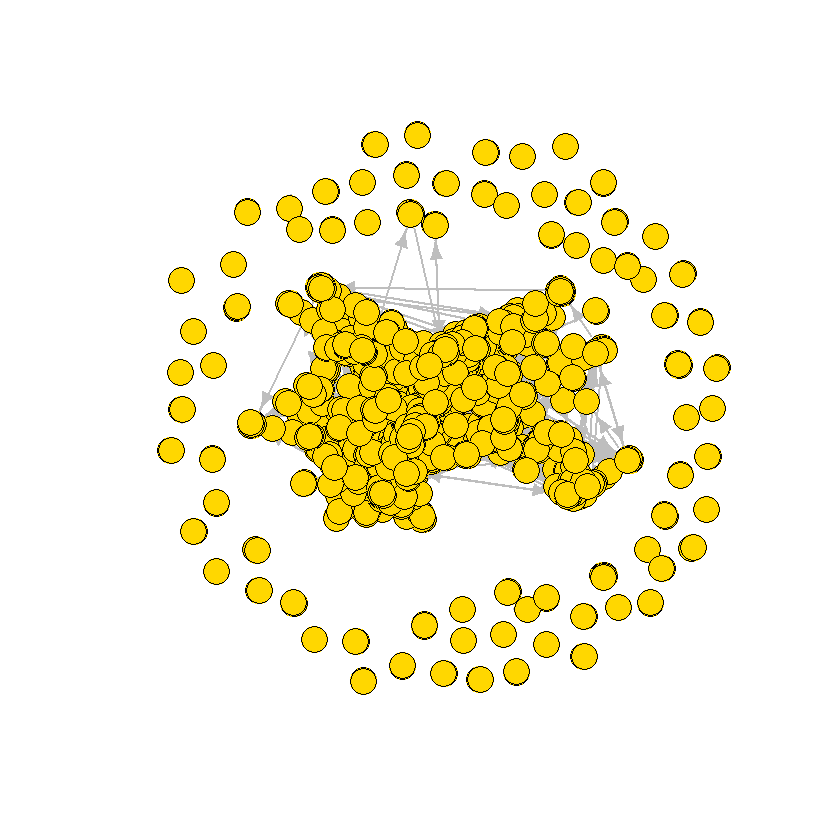

In [3]:
# Plot of network
plot(g,layout=layout_nicely,vertex.label=NA, 
       vertex.color="gold", vertex.size = 10, edge.arrow.size = 0.8, edge.width=2.0, edge.color = "gray")

 ### 4. Examine the data: 
- Find number of nodes 
- Find number of edges 
- Find the edgelist (“from”, “to”)

In [4]:
# As graph node
g

IGRAPH 1596187 DN-- 2337 5562 -- 
+ attr: name (v/c), V3 (e/n), V4 (e/n)
+ edges from 1596187 (vertex names):
 [1] 6  ->5   6  ->4   17 ->13  13 ->17  13 ->29  29 ->13  17 ->20  31 ->4  
 [9] 1  ->31  35 ->6   7  ->29  1  ->20  47 ->1   45 ->39  45 ->53  53 ->45 
[17] 45 ->54  54 ->45  36 ->41  41 ->36  36 ->21  21 ->36  29 ->7   39 ->21 
[25] 21 ->39  4  ->61  61 ->2   65 ->35  56 ->1   1  ->56  4  ->66  66 ->4  
[33] 39 ->69  69 ->39  69 ->35  7  ->28  57 ->4   1  ->68  68 ->1   81 ->69 
[41] 69 ->81  7  ->89  89 ->7   15 ->97  97 ->15  62 ->54  54 ->62  80 ->25 
[49] 100->60  81 ->107 96 ->107 107->96  64 ->112 112->64  112->115 6  ->114
[57] 7  ->100 60 ->56  1  ->76  76 ->1   116->7   7  ->116 54 ->13  13 ->54 
+ ... omitted several edges

In [5]:
# Vertices
# From result below, vertices = 5,881
V(g)

+ 2337/2337 vertices, named, from 1596187:
   [1] 6    17   13   29   31   1    35   7    47   45   53   54   36   41  
  [15] 21   39   4    61   65   56   66   69   57   68   81   89   15   97  
  [29] 62   80   100  96   107  64   112  60   76   116  2    132  113  125 
  [43] 135  78   110  93   104  154  158  153  114  157  75   169  171  166 
  [57] 156  175  148  181  183  184  33   189  159  200  207  142  143  206 
  [71] 213  217  232  222  202  240  244  228  248  245  251  259  23   215 
  [85] 221  261  230  141  37   219  274  295  282  272  229  198  204  186 
  [99] 312  273  254  321  289  266  350  353  139  285  325  149  357  393 
 [113] 387  401  408  293  410  418  356  371  239  433  421  404  178  320 
 [127] 443  214  352  446  363  297  203  456  427  441  144  345  463  462 
+ ... omitted several vertices

In [6]:
# Edge
# From result below, Edge = 35,592
E(g)

+ 5562/5562 edges from 1596187 (vertex names):
 [1] 6  ->5   6  ->4   17 ->13  13 ->17  13 ->29  29 ->13  17 ->20  31 ->4  
 [9] 1  ->31  35 ->6   7  ->29  1  ->20  47 ->1   45 ->39  45 ->53  53 ->45 
[17] 45 ->54  54 ->45  36 ->41  41 ->36  36 ->21  21 ->36  29 ->7   39 ->21 
[25] 21 ->39  4  ->61  61 ->2   65 ->35  56 ->1   1  ->56  4  ->66  66 ->4  
[33] 39 ->69  69 ->39  69 ->35  7  ->28  57 ->4   1  ->68  68 ->1   81 ->69 
[41] 69 ->81  7  ->89  89 ->7   15 ->97  97 ->15  62 ->54  54 ->62  80 ->25 
[49] 100->60  81 ->107 96 ->107 107->96  64 ->112 112->64  112->115 6  ->114
[57] 7  ->100 60 ->56  1  ->76  76 ->1   116->7   7  ->116 54 ->13  13 ->54 
[65] 54 ->2   2  ->54  132->127 113->125 125->113 113->23  113->135 135->113
[73] 78 ->36  36 ->78  2  ->132 132->2   60 ->100 7  ->141 110->76  21 ->132
+ ... omitted several edges

In [7]:
# Edgelist
el <- as_edgelist(g, names=T)
head(el)
tail(el)
graph_from_edgelist(el)

[,1] [,2]
[1,] 6    5   
[2,] 6    4   
[3,] 17   13  
[4,] 13   17  
[5,] 13   29  
[6,] 29   13

[,1] [,2]
[5557,] 4608 13  
[5558,] 4608 2045
[5559,] 2045 4608
[5560,] 13   4608
[5561,] 1810 4499
[5562,] 1128 13

IGRAPH 1a45555 DN-- 2337 5562 -- 
+ attr: name (v/c)
+ edges from 1a45555 (vertex names):
 [1] 6  ->5   6  ->4   17 ->13  13 ->17  13 ->29  29 ->13  17 ->20  31 ->4  
 [9] 1  ->31  35 ->6   7  ->29  1  ->20  47 ->1   45 ->39  45 ->53  53 ->45 
[17] 45 ->54  54 ->45  36 ->41  41 ->36  36 ->21  21 ->36  29 ->7   39 ->21 
[25] 21 ->39  4  ->61  61 ->2   65 ->35  56 ->1   1  ->56  4  ->66  66 ->4  
[33] 39 ->69  69 ->39  69 ->35  7  ->28  57 ->4   1  ->68  68 ->1   81 ->69 
[41] 69 ->81  7  ->89  89 ->7   15 ->97  97 ->15  62 ->54  54 ->62  80 ->25 
[49] 100->60  81 ->107 96 ->107 107->96  64 ->112 112->64  112->115 6  ->114
[57] 7  ->100 60 ->56  1  ->76  76 ->1   116->7   7  ->116 54 ->13  13 ->54 
+ ... omitted several edges

### 5: Simplify the network by removing all the multiple edges and loops.

In [8]:
# Simplified Network
g1 = simplify(g,remove.multiple = TRUE,remove.loops = TRUE,edge.attr.comb = igraph_opt("edge.attr.comb"))
head(g1)

   [[ suppressing 2337 column names '6', '17', '13' ... ]]



6 x 2337 sparse Matrix of class "dgCMatrix"
                                                                              
6  . . . . . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . .
17 . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
13 . 1 . 1 . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . .
29 . . 1 . . . . 1 . . . . . . . . . . . . . . . . . . . . 1 . . . . . . 1 . .
31 . . . . . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . .
1  . . . . 1 . . . . . . . . . . . . . . 1 . . . 1 . . . . . 1 . . . . . . 1 .
                                                                              
6  . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . .
17 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
13 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
29 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
31 . . .

In [9]:
# Verification of simplified network
is_simple(g1)

[1] TRUE

### 6. Extract the adjacency matrix of the network and display.

In [10]:
# Adjacency matrix of the netwrk and display
g2 <- as_adjacency_matrix(g1)
g3 <- graph.adjacency(g2)
g3
V(g3)
E(g3)

IGRAPH 1afcdd1 DN-- 2337 5562 -- 
+ attr: name (v/c)
+ edges from 1afcdd1 (vertex names):
 [1] 35  ->6  219 ->6  521 ->6  664 ->6  937 ->6  1018->6  1810->6  2028->6 
 [9] 2187->6  13  ->17 184 ->17 254 ->17 149 ->17 1018->17 1859->17 17  ->13
[17] 29  ->13 54  ->13 350 ->13 592 ->13 546 ->13 1204->13 1223->13 1128->13
[25] 1585->13 1788->13 1910->13 1565->13 1890->13 1986->13 2006->13 2011->13
[33] 591 ->13 2123->13 2194->13 1998->13 2045->13 2048->13 2411->13 2555->13
[41] 2589->13 2607->13 160 ->13 3628->13 3923->13 2839->13 3405->13 4301->13
[49] 4515->13 4608->13 5984->13 13  ->29 7   ->29 60  ->29 251 ->29 274 ->29
[57] 521 ->29 1363->29 3204->29 1   ->31 47  ->1  56  ->1  68  ->1  76  ->1 
+ ... omitted several edges

+ 2337/2337 vertices, named, from 1afcdd1:
   [1] 6    17   13   29   31   1    35   7    47   45   53   54   36   41  
  [15] 21   39   4    61   65   56   66   69   57   68   81   89   15   97  
  [29] 62   80   100  96   107  64   112  60   76   116  2    132  113  125 
  [43] 135  78   110  93   104  154  158  153  114  157  75   169  171  166 
  [57] 156  175  148  181  183  184  33   189  159  200  207  142  143  206 
  [71] 213  217  232  222  202  240  244  228  248  245  251  259  23   215 
  [85] 221  261  230  141  37   219  274  295  282  272  229  198  204  186 
  [99] 312  273  254  321  289  266  350  353  139  285  325  149  357  393 
 [113] 387  401  408  293  410  418  356  371  239  433  421  404  178  320 
 [127] 443  214  352  446  363  297  203  456  427  441  144  345  463  462 
+ ... omitted several vertices

+ 5562/5562 edges from 1afcdd1 (vertex names):
 [1] 35  ->6  219 ->6  521 ->6  664 ->6  937 ->6  1018->6  1810->6  2028->6 
 [9] 2187->6  13  ->17 184 ->17 254 ->17 149 ->17 1018->17 1859->17 17  ->13
[17] 29  ->13 54  ->13 350 ->13 592 ->13 546 ->13 1204->13 1223->13 1128->13
[25] 1585->13 1788->13 1910->13 1565->13 1890->13 1986->13 2006->13 2011->13
[33] 591 ->13 2123->13 2194->13 1998->13 2045->13 2048->13 2411->13 2555->13
[41] 2589->13 2607->13 160 ->13 3628->13 3923->13 2839->13 3405->13 4301->13
[49] 4515->13 4608->13 5984->13 13  ->29 7   ->29 60  ->29 251 ->29 274 ->29
[57] 521 ->29 1363->29 3204->29 1   ->31 47  ->1  56  ->1  68  ->1  76  ->1 
[65] 104 ->1  114 ->1  75  ->1  171 ->1  141 ->1  266 ->1  139 ->1  421 ->1 
[73] 630 ->1  522 ->1  647 ->1  579 ->1  1487->1  1771->1  1753->1  1944->1 
+ ... omitted several edges

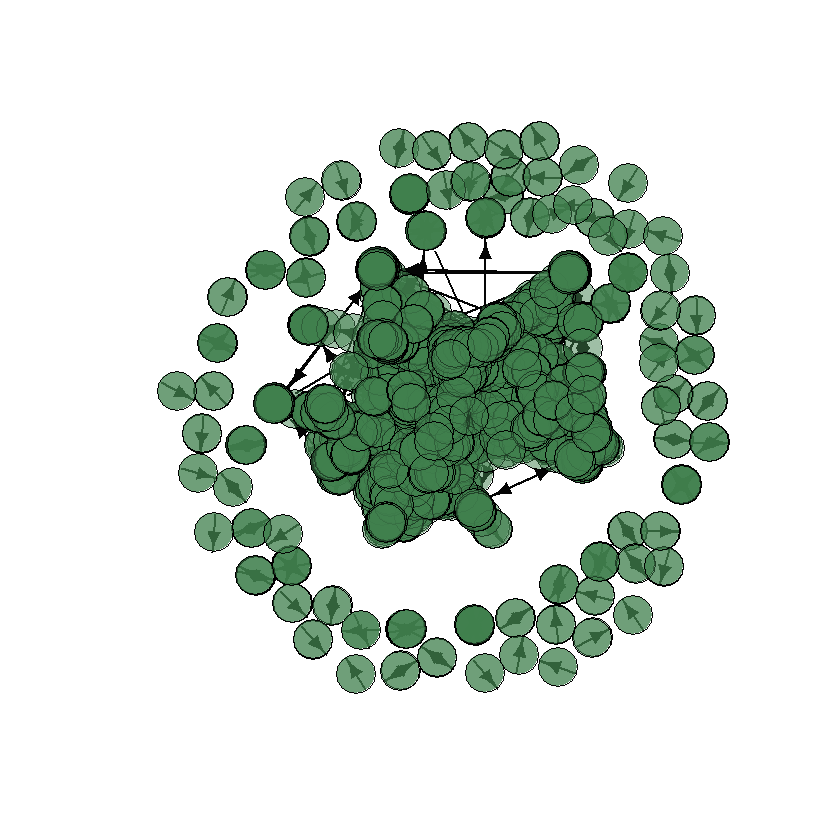

In [11]:
# Plot of simplified network, g3
plot(g3,layout=layout_nicely,vertex.label=NA, 
       vertex.color=rgb(.25, .5, .3, alpha=.5), vertex.size = 15, edge.arrow.size = 0.8, edge.width=2.0, edge.color = "gray2")

### 7. Replace the vertex labels (auto label) of each node with the node names stored in the data table.

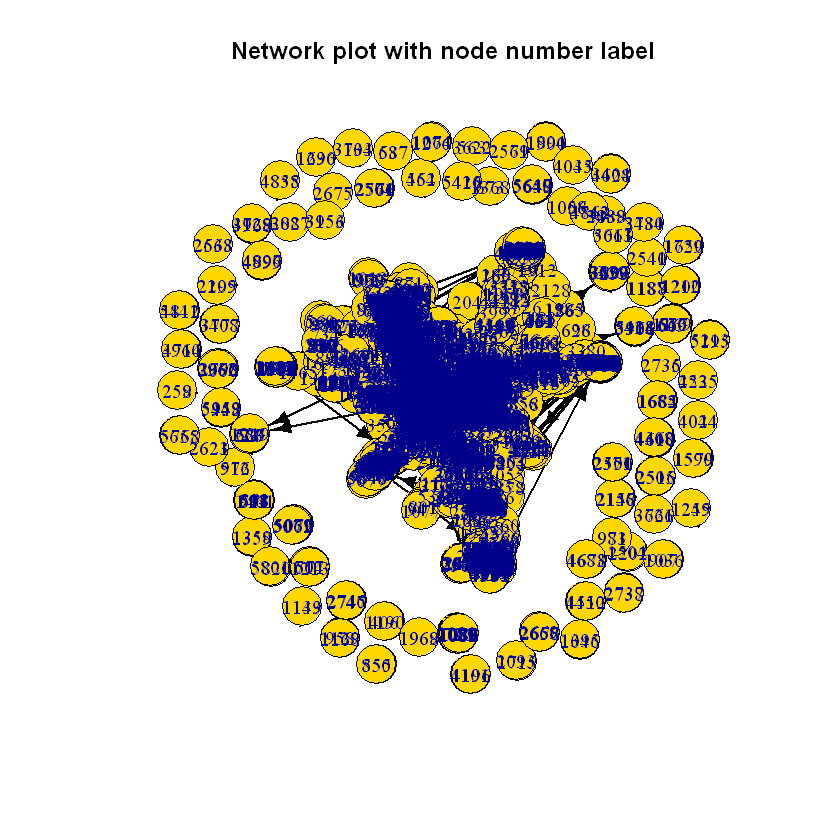

In [12]:
# Replace the vertex label with the node names stored in data table

plot(g3,layout=layout_nicely,vertex.label=V(g3)$name, main = "Network plot with node number label", 
       vertex.color="gold", vertex.size = 15, edge.arrow.size = 0.8, edge.width=2.0, edge.color = "gray2")

### 8. Generate node color based on the type of nodes. Add legends to explain the meaning of colors.

In [13]:
# Node color based on the type of node. In this case, we will choose Community detection based on label propagation:
clu <- components(g3)
groups(clu)

$`1`
   [1] "6"    "17"   "13"   "29"   "31"   "1"    "35"   "7"    "47"   "45"  
  [11] "53"   "54"   "36"   "41"   "21"   "39"   "4"    "61"   "65"   "56"  
  [21] "66"   "69"   "57"   "68"   "81"   "89"   "15"   "97"   "62"   "80"  
  [31] "100"  "96"   "107"  "64"   "112"  "60"   "76"   "116"  "2"    "132" 
  [41] "113"  "125"  "135"  "78"   "110"  "93"   "104"  "154"  "158"  "153" 
  [51] "114"  "157"  "75"   "169"  "171"  "166"  "156"  "175"  "148"  "181" 
  [61] "183"  "184"  "33"   "189"  "159"  "200"  "207"  "142"  "143"  "206" 
  [71] "213"  "217"  "232"  "222"  "202"  "240"  "244"  "228"  "248"  "245" 
  [81] "251"  "23"   "215"  "221"  "261"  "230"  "141"  "37"   "219"  "274" 
  [91] "295"  "282"  "272"  "229"  "198"  "204"  "186"  "312"  "273"  "254" 
 [101] "321"  "289"  "266"  "350"  "353"  "139"  "285"  "325"  "149"  "357" 
 [111] "393"  "387"  "401"  "408"  "293"  "410"  "418"  "356"  "371"  "239" 
 [121] "433"  "421"  "404"  "178"  "320"  "443"  "214"  "352"  "446"  "363" 
 [131] "297"  "203"  "456"  "427"  "441"  "144"  "345"  "463"  "462"  "473" 
 [141] "235"  "455"  "256"  "469"  "424"  "322"  "479"  "224"  "481"  "489" 
 [151] "492"  "472"  "440"  "484"  "280"  "499"  "501"  "491"  "498"  "384" 
 [161] "396"  "399"  "386"  "359"  "527"  "532"  "447"  "383"  "521"  "270" 
 [171] "416"  "520"  "542"  "309"  "548"  "480"  "547"  "554"  "557"  "88"  
 [181] "468"  "561"  "558"  "530"  "262"  "269"  "474"  "405"  "578"  "580" 
 [191] "603"  "268"  "502"  "304"  "605"  "523"  "631"  "592"  "632"  "588" 
 [201] "342"  "495"  "638"  "652"  "661"  "635"  "390"  "663"  "659"  "650" 
 [211] "664"  "651"  "666"  "654"  "630"  "544"  "670"  "522"  "686"  "667" 
 [221] "689"  "378"  "691"  "361"  "700"  "620"  "705"  "26"   "704"  "626" 
 [231] "417"  "718"  "725"  "731"  "743"  "732"  "576"  "753"  "678"  "688" 
 [241] "734"  "754"  "507"  "621"  "634"  "249"  "772"  "647"  "535"  "733" 
 [251] "640"  "796"  "798"  "797"  "757"  "799"  "536"  "801"  "697"  "817" 
 [261] "780"  "579"  "724"  "770"  "823"  "779"  "755"  "839"  "560"  "775" 
 [271] "851"  "852"  "856"  "687"  "860"  "863"  "838"  "866"  "283"  "864" 
 [281] "871"  "475"  "874"  "875"  "374"  "878"  "879"  "882"  "884"  "537" 
 [291] "546"  "899"  "742"  "617"  "901"  "906"  "802"  "227"  "912"  "913" 
 [301] "908"  "714"  "712"  "791"  "921"  "658"  "926"  "346"  "927"  "867" 
 [311] "937"  "885"  "853"  "525"  "947"  "948"  "917"  "952"  "931"  "957" 
 [321] "832"  "964"  "968"  "827"  "967"  "974"  "979"  "894"  "984"  "610" 
 [331] "940"  "941"  "811"  "989"  "593"  "616"  "996"  "1000" "903"  "943" 
 [341] "1001" "1003" "1002" "1006" "1011" "777"  "925"  "807"  "904"  "976" 
 [351] "1026" "960"  "978"  "1013" "1037" "1005" "209"  "1047" "1009" "1050"
 [361] "1049" "920"  "1040" "72"   "1010" "1063" "1043" "954"  "1074" "1077"
 [371] "1019" "1092" "1094" "1098" "881"  "1105" "461"  "804"  "1030" "533" 
 [381] "1119" "1100" "962"  "1135" "1067" "627"  "1157" "988"  "710"  "655" 
 [391] "1164" "538"  "1048" "540"  "1165" "1204" "1104" "1166" "1214" "1223"
 [401] "1233" "1237" "1217" "1239" "1207" "946"  "1243" "923"  "608"  "1244"
 [411] "1245" "1226" "1222" "1025" "835"  "1269" "1273" "1257" "1268" "1263"
 [421] "1280" "1090" "905"  "846"  "1053" "1277" "566"  "1107" "589"  "1317"
 [431] "1034" "1332" "1115" "929"  "1292" "1307" "1302" "1162" "1128" "1352"
 [441] "1373" "1374" "1242" "1310" "1201" "1384" "1018" "1392" "1396" "1348"
 [451] "1375" "1410" "1411" "1413" "1267" "1366" "1415" "1376" "1423" "1422"
 [461] "1425" "1435" "1383" "1436" "963"  "1319" "1444" "1443" "922"  "243" 
 [471] "1454" "163"  "1334" "1464" "1439" "1354" "1400" "1185" "1377" "1479"
 [481] "1477" "1465" "1386" "1406" "1493" "1473" "1438" "1492" "1484" "1480"
 [491] "1328" "1469" "1517" "665"  "786"  "1525" "1531" "1353" "1520" "1412"
 [501] "1463" "1478" "1543" "1555" "1404" "1539" "1548" "1541" "1519" "1512"
 [511] "1568" "1569" "1573" "1556" "1542" "1526" "1585" "1566" "1593

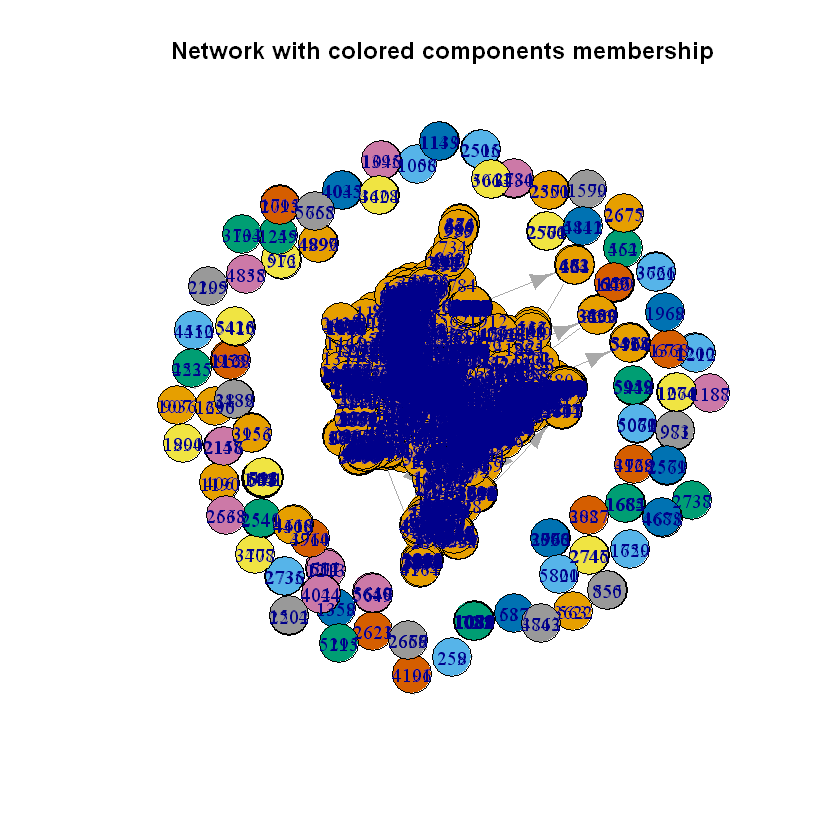

In [14]:
plot(g3, vertex.color=membership(clu), main = "Network with colored components membership")

### 9. Set the node size based on the degree of the node.

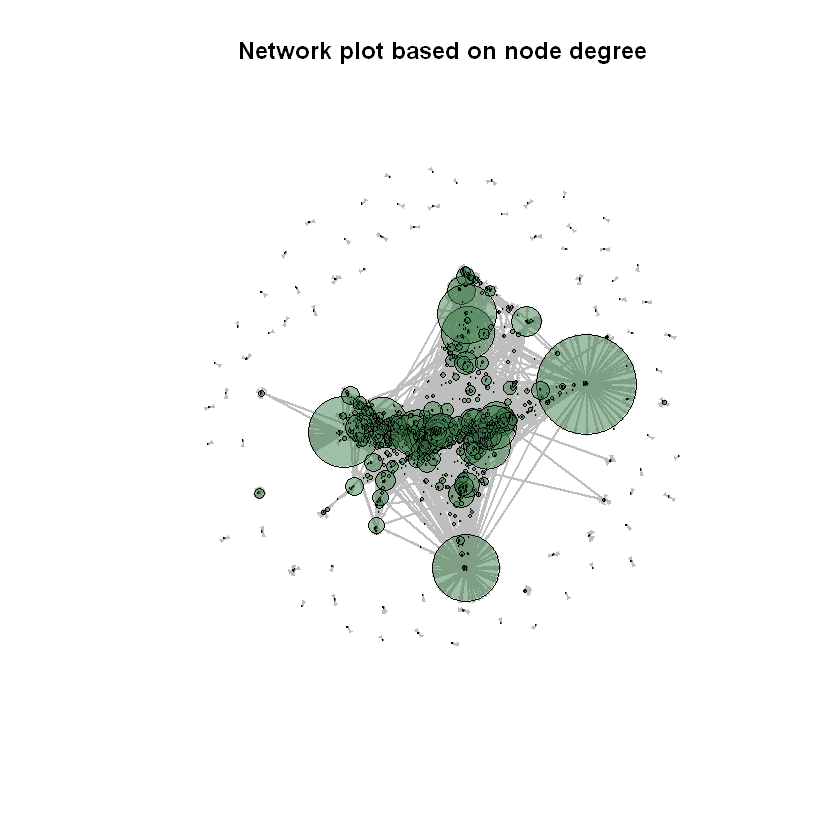

In [15]:
# Set the node size based on the degree of the node.

deg <- degree(g3, mode="out")
plot(g3, layout=layout_nicely, vertex.size = deg*0.5, edge.arrow.size = .2, main = "Network plot based on node degree", 
     vertex.color = rgb(.25, .5, .3, alpha=.5), vertex.label=NA, , edge.width=2.0, edge.color = "gray")

### 10. Use 5 different type of layouts in igraph to plot the network and display it. Explain the changes in the network structure and compare your network based on the different layout algorithm that you have used.

These plots are based on Force-directed graph drawing algorithms i.e Kamada Kawai and Fruchterman Reingold etc. The purpose is to position the nodes of a graph in 2D or 3D space so that all the edges are in equal length and minimal crossing edges.

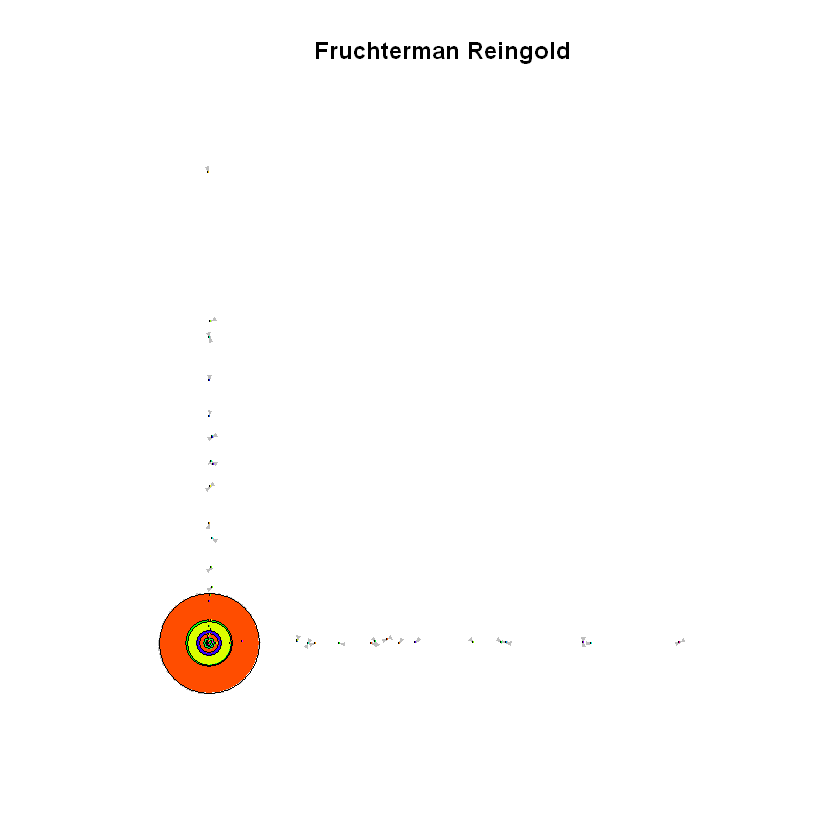

In [16]:
# Fruchterman Reingold
plot(g3, layout=layout_with_fr, vertex.size = deg*0.5, edge.arrow.size = .2, main = "Fruchterman Reingold", 
     vertex.color = rainbow(100), vertex.label=NA, , edge.width=2.0, edge.color = "gray")

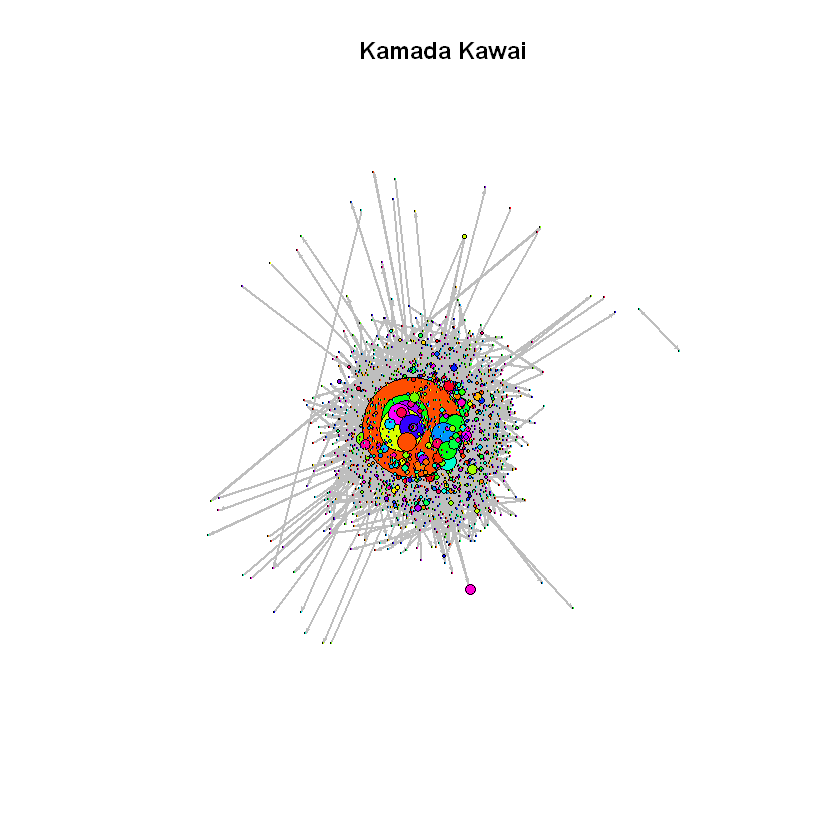

In [17]:
# Kamada Kawai
plot(g3, layout=layout_with_kk, vertex.size = deg*0.5, edge.arrow.size = .2, main = "Kamada Kawai", 
     vertex.color = rainbow(100), vertex.label=NA, , edge.width=2.0, edge.color = "gray")

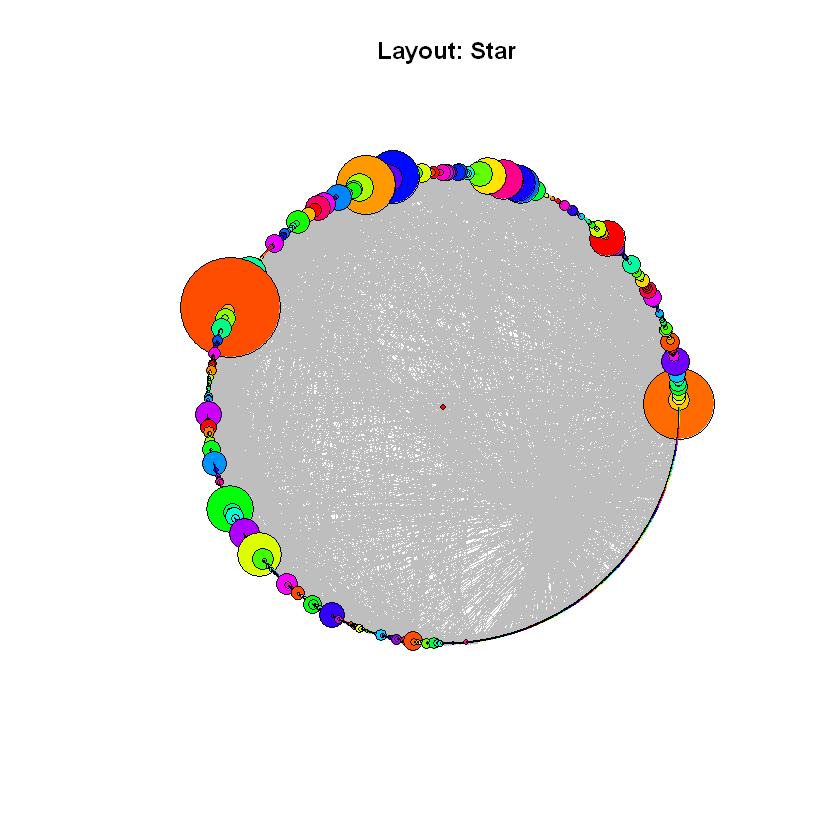

In [18]:
# Star
plot(g3, layout= layout_as_star, vertex.size = deg*0.5, edge.arrow.size = .2, main = " Layout: Star", 
     vertex.color = rainbow(100), vertex.label=NA, , edge.width=0.1, edge.color = "gray")

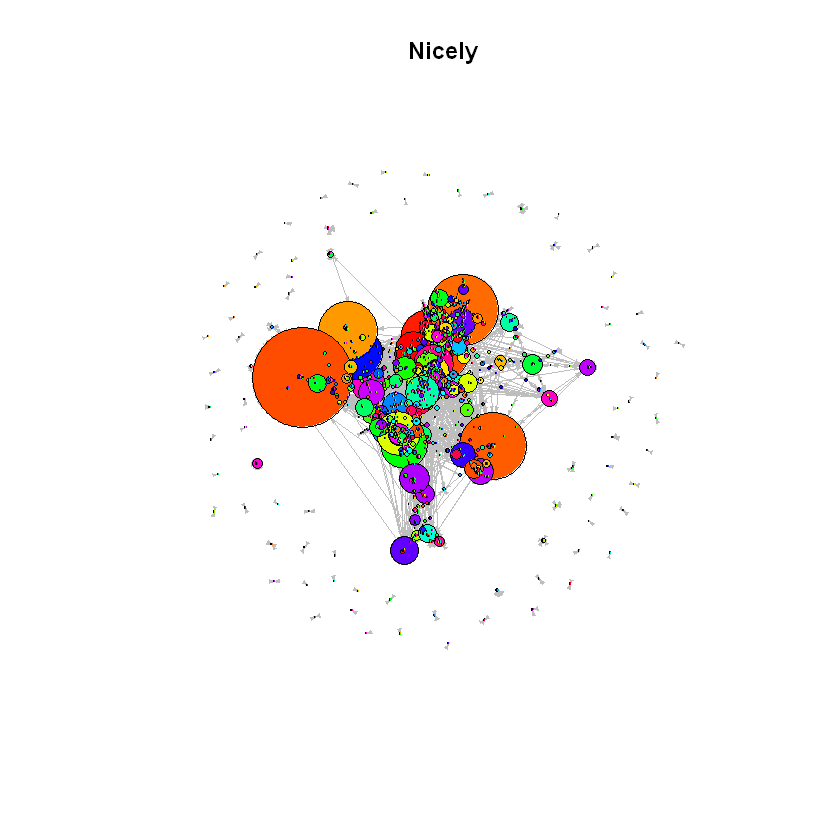

In [19]:
# Nicely
plot(g3, layout=layout_nicely, vertex.size = deg*0.5, edge.arrow.size = .2, main = "Nicely", 
     vertex.color = rainbow(100), vertex.label=NA, , edge.width=0.5, edge.color = "gray")

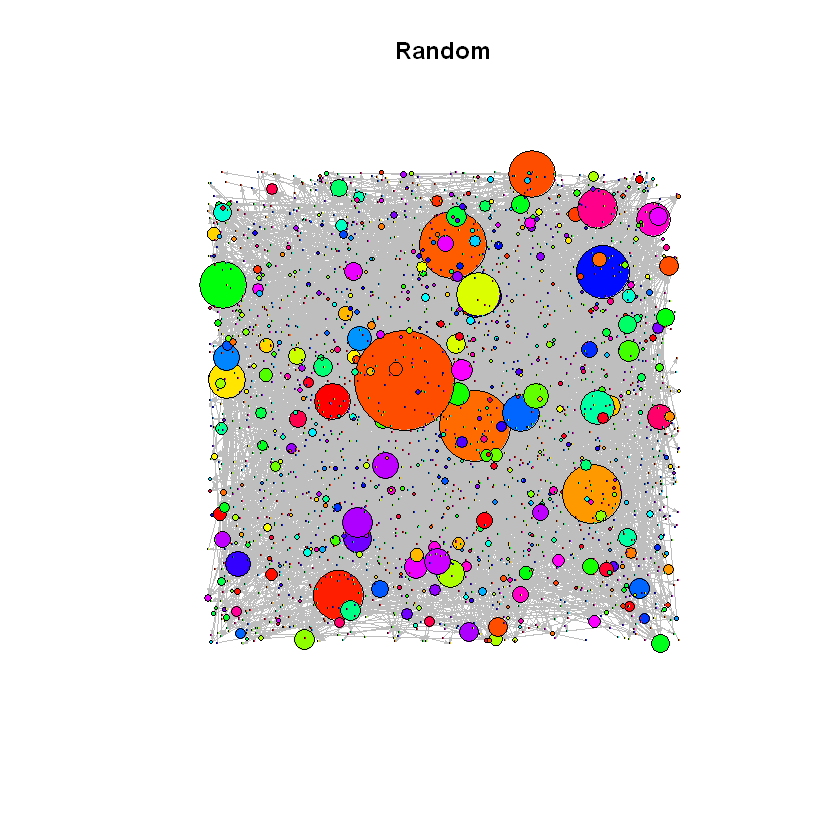

In [20]:
# Random
plot(g3, layout=layout_randomly, vertex.size = deg*0.5, edge.arrow.size = .2, main = "Random", 
     vertex.color = rainbow(100), vertex.label=NA, , edge.width=0.1, edge.color = "gray")

### 11. Give a degree range for the nodes you want to explore and keep only the nodes that ties between the chosen range. Display the network. Display the evolution of network by changing the node degree range till you get a network with separated components.

In [21]:
deg = degree(g3)
degSorted <-sort.int(deg,decreasing=T,index.return=FALSE)
df = data.frame(degSorted)
head(df)


degSorted
2642 164      
35   155      
7    113      
2028 100      
1810  95      
13    79

In [22]:
degree_freq <- data.frame(table(deg))
head(degree_freq)
tail(degree_freq)

deg Freq
1 1   820 
2 2   590 
3 3   225 
4 4   152 
5 5    97 
6 6    73

deg Freq
60 79  1   
61 95  1   
62 100 1   
63 113 1   
64 155 1   
65 164 1

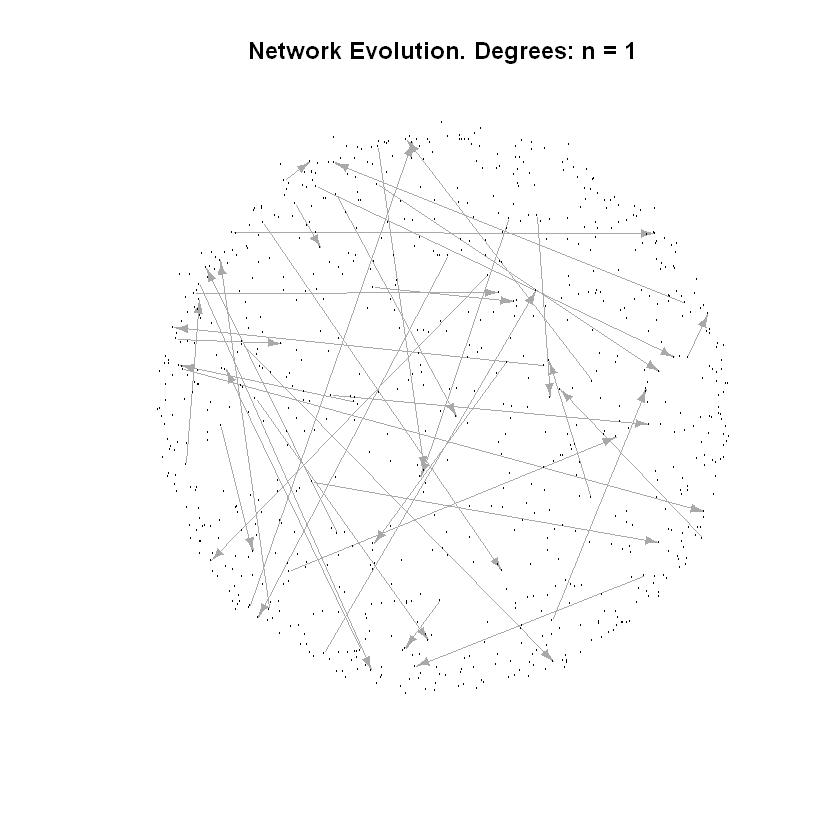

In [23]:
n <- delete.vertices(g3, V(g3)[ degree(g3) > 1 ])
plot(n, layout=layout_with_kk, main = "Network Evolution. Degrees: n = 1", vertex.color=rainbow(degree(n)*10), 
     vertex.size=degree(n)*0.5, edge.arrow.size= 0.5, vertex.label = NA)

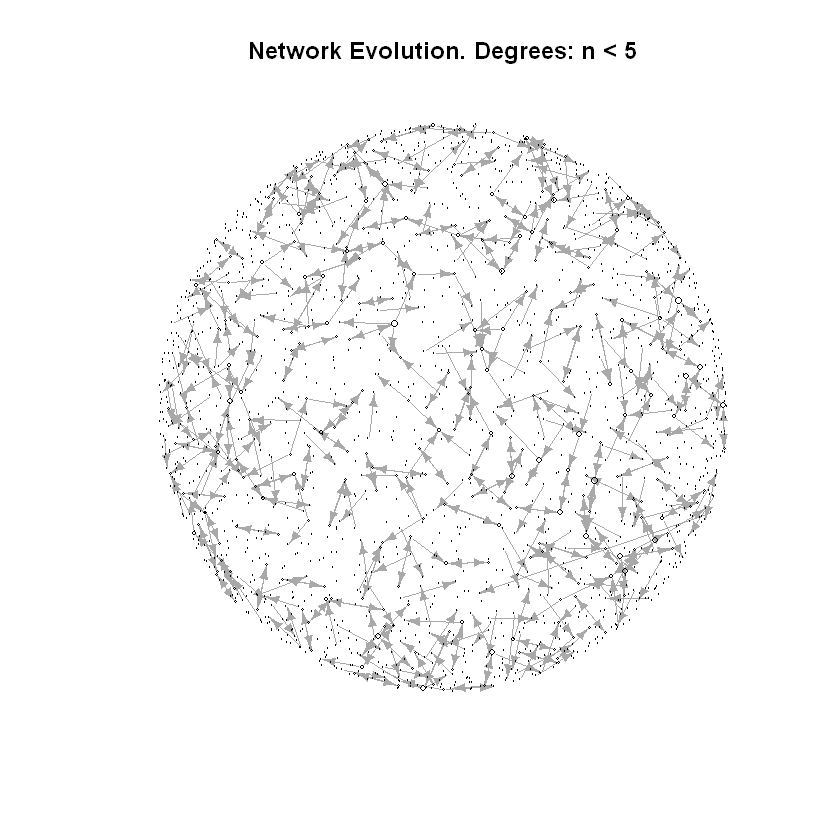

In [24]:
n <- delete.vertices(g3, V(g3)[ degree(g3) > 5 ])
plot(n, layout=layout_with_kk, main = "Network Evolution. Degrees: n < 5", vertex.color=rainbow(degree(n)*10), 
     vertex.size=degree(n)*0.5, edge.arrow.size= 0.5, vertex.label = NA)

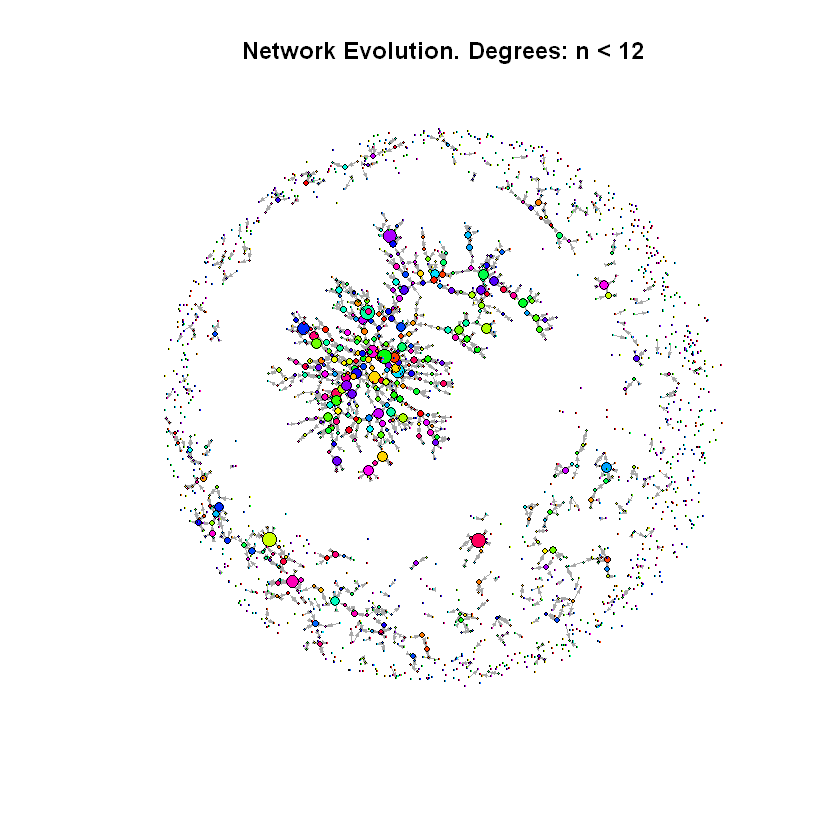

In [25]:
n <- delete.vertices(g3, V(g3)[ degree(g3) > 12 ])
plot(n, layout=layout_with_kk, main = "Network Evolution. Degrees: n < 12", vertex.color=rainbow(degree(n)*10), 
     vertex.size=degree(n)*0.5, edge.arrow.size= 0.2, vertex.label = NA)

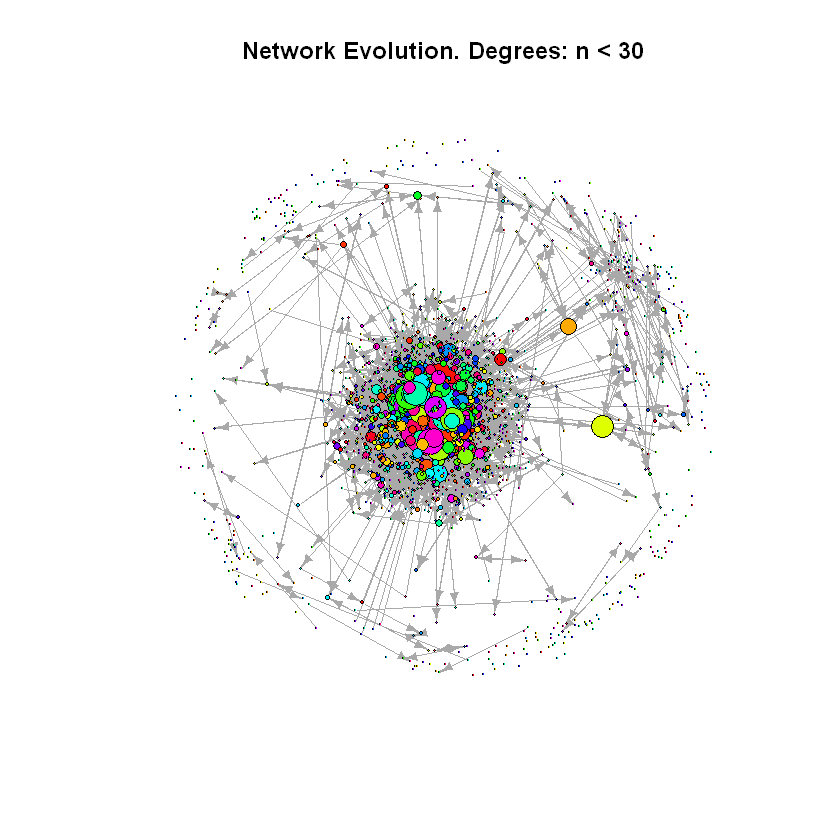

In [26]:
n <- delete.vertices(g3, V(g3)[ degree(g3) > 30 ])
plot(n, layout=layout_with_kk, main = "Network Evolution. Degrees: n < 30", vertex.color=rainbow(degree(n)*10), 
     vertex.size=degree(n)*0.5, edge.arrow.size= 0.5, vertex.label = NA)

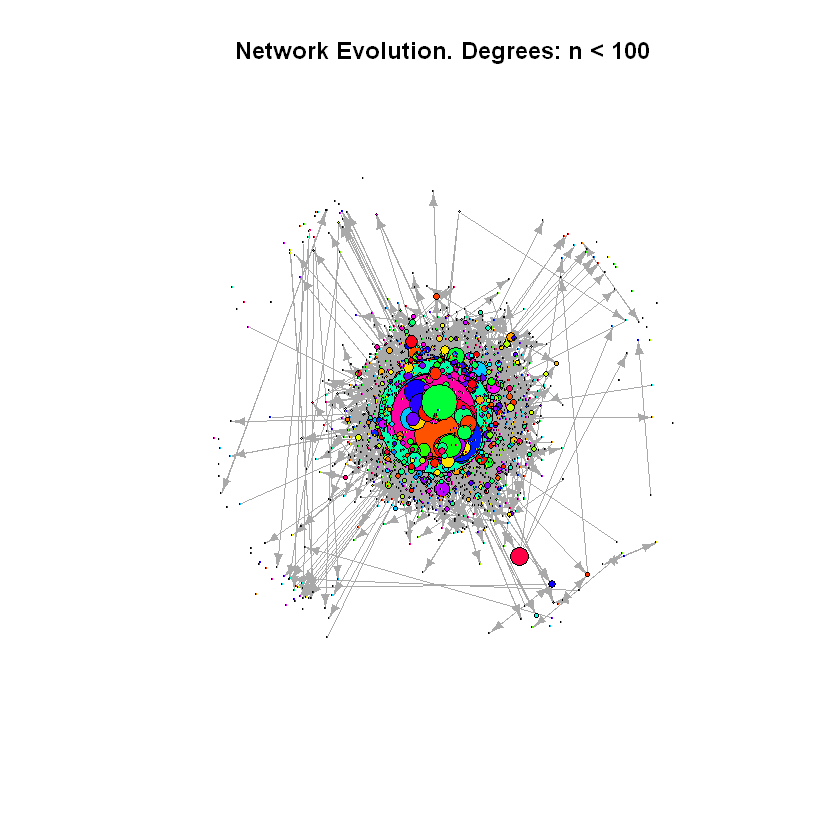

In [27]:
n <- delete.vertices(g3, V(g3)[ degree(g3) > 100 ])
plot(n, layout=layout_with_kk, main = "Network Evolution. Degrees: n < 100", vertex.color=rainbow(degree(n)*10), 
     vertex.size=degree(n)*0.5, edge.arrow.size= 0.5, vertex.label = NA)

# Network and node descriptions

### 1. Using the same network (simplified network), find the density of the network.

In [28]:
cat("Density of Network:", edge_density(g3, loops = FALSE))

Density of Network: 0.001018825

In [29]:
#for an undirected network
ecount(g3)/(vcount(g3)*(vcount(g3)-1))*2 

[1] 0.002037649

### 2. Find the number of triangles formed in the network.

In [30]:
tri=cliques(g3,min=3,max=3)
cat("No of Triangles:", nrow(matrix(tri)))

Warning message in cliques(g3, min = 3, max = 3):
"At igraph_cliquer.c:57 :Edge directions are ignored for clique calculations"


No of Triangles: 490

### 3. What is the diameter of the network?

In [31]:
cat("Diameter of Network:", diameter(g3))

Diameter of Network: 14

### 4. The nodes color that pass through the longest shortest path.

In [32]:
diam <- get_diameter(g3, directed=T)
diam

+ 15/2337 vertices, named, from 1afcdd1:
 [1] 463  462  576  507  415  2233 1352 35   7    135  113  203  1092 804  3479

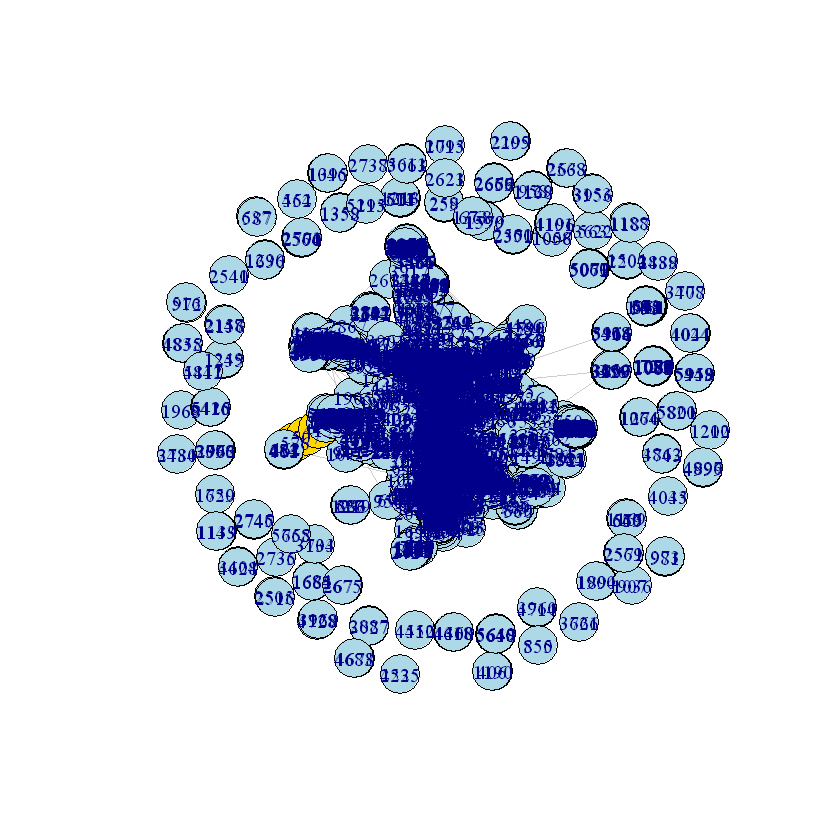

In [33]:
vcol <- rep("light blue", vcount(g3))
vcol[diam] <- "gold"
ecol <- rep("gray80", ecount(g3))
ecol[E(g3, path=diam)] <- "orange" 

# E(net, path=diam) finds edges along a path, here 'diam'

plot(g3, vertex.color=vcol, edge.color=ecol, edge.arrow.mode=0)

### 5. List the degree of nodes and display it in a table. Create a histogram of the node degree.

In [34]:
df = data.frame(deg)
head(df)
tail(df)

deg
6  14 
17 12 
13 79 
29 16 
31  2 
1  72

deg
5913 1  
5299 1  
5925 2  
5959 1  
3063 1  
5974 1

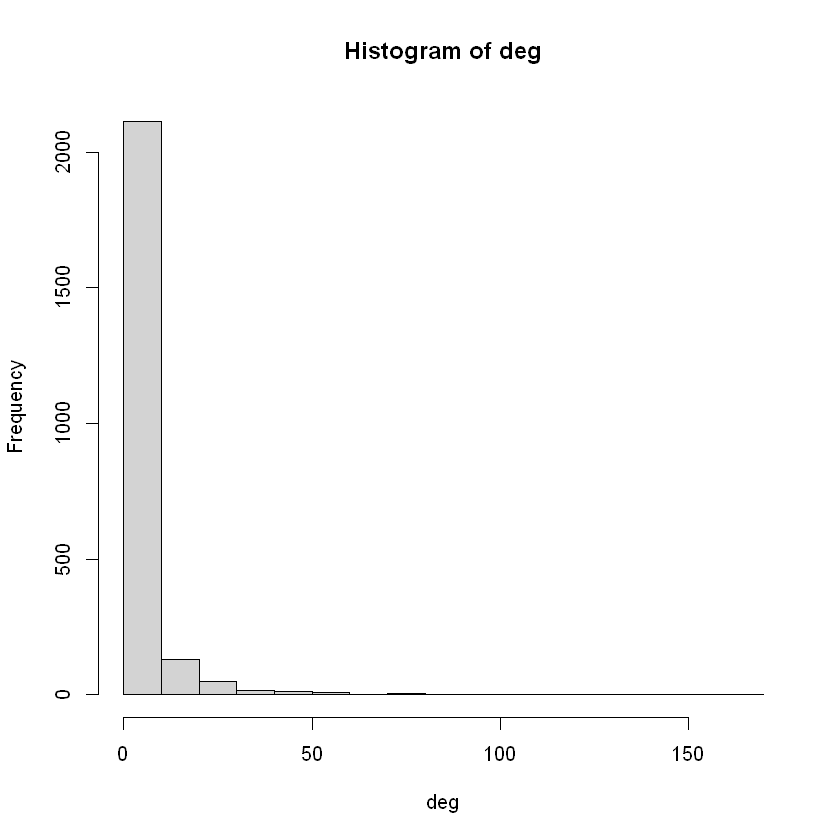

In [35]:
hist(deg)

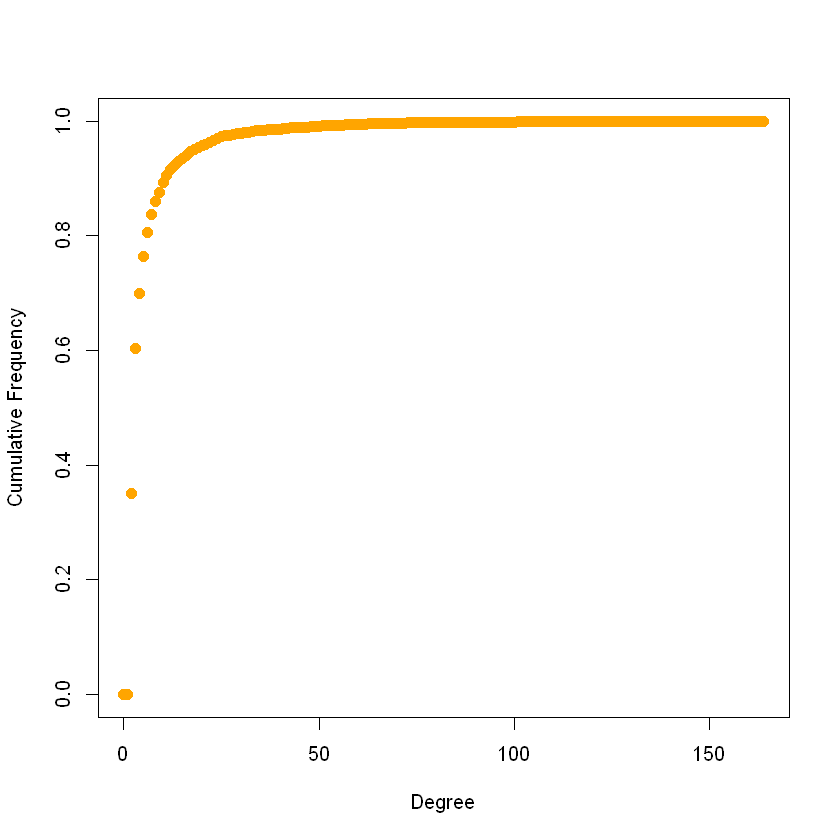

In [36]:
deg.dist <- degree_distribution(g3, cumulative=T, mode="all")
plot( x=0:max(deg), y=1-deg.dist, pch=19, cex=1.2, col="orange", 
     xlab="Degree", ylab="Cumulative Frequency")

# Centrality Values

### 1. Rank the nodes based on degree, betweenness, closeness and eigenvector centrality value and display it in a table.

In [37]:
# Rank by Degree
deg <- degree(g3)
degSorted <-sort.int(deg,decreasing=T,index.return=FALSE)
df <- data.frame(degSorted)
head(df)
tail(df)

degSorted
2642 164      
35   155      
7    113      
2028 100      
1810  95      
13    79

degSorted
5845 1        
5913 1        
5299 1        
5959 1        
3063 1        
5974 1

In [38]:
# Rank by betweeness
btw <- betweenness(g3,  v = V(g3),  directed = TRUE,  weights = NULL,  nobigint = TRUE,  normalized = FALSE)
btw <-data.frame(sort.int(btw,decreasing=T,index.return=FALSE))
head(btw)
tail(btw)



sort.int.btw..decreasing...T..index.return...FALSE.
35   327299.3                                           
7    287766.9                                           
2642 239333.8                                           
905  176817.0                                           
1810 150901.0                                           
13   150331.0

sort.int.btw..decreasing...T..index.return...FALSE.
5913 0                                                  
5299 0                                                  
5925 0                                                  
5959 0                                                  
3063 0                                                  
5974 0

In [39]:
clo <- data.frame(igraph::closeness(g3, mode="all", weights=NA) %>%sort(decreasing = TRUE)%>%.[1:6])
clo

Warning message in igraph::closeness(g3, mode = "all", weights = NA):
"At centrality.c:2874 :closeness centrality is not well-defined for disconnected graphs"


igraph..closeness.g3..mode....all...weights...NA......sort.decreasing...TRUE......
905  2.186308e-06                                                                      
35   2.185869e-06                                                                      
7    2.185768e-06                                                                      
1396 2.185248e-06                                                                      
1832 2.185171e-06                                                                      
2388 2.185014e-06

In [40]:
# Rank by closeness
close <- closeness(g3,  vids = V(g3),  mode = c("all"),  weights = NULL,  normalized = FALSE)
clo <-data.frame(sort.int(close,decreasing=T,index.return=FALSE))
head(clo)
tail(clo)

Warning message in closeness(g3, vids = V(g3), mode = c("all"), weights = NULL, :
"At centrality.c:2874 :closeness centrality is not well-defined for disconnected graphs"


sort.int.close..decreasing...T..index.return...FALSE.
905  2.186308e-06                                         
35   2.185869e-06                                         
7    2.185768e-06                                         
1396 2.185248e-06                                         
1832 2.185171e-06                                         
2388 2.185014e-06

sort.int.close..decreasing...T..index.return...FALSE.
5195 1.832544e-07                                         
5441 1.832544e-07                                         
5768 1.832544e-07                                         
3956 1.832544e-07                                         
5801 1.832544e-07                                         
3063 1.832544e-07

In [41]:
ec <-eigen_centrality(g3,directed = TRUE,scale = TRUE,weights = NULL,options = arpack_defaults)
ec <-data.frame(sort.int(ec$vector,decreasing=T,index.return=FALSE))
head(ec)
tail(ec)

sort.int.ec.vector..decreasing...T..index.return...FALSE.
1832 1.0000000                                                
1565 0.9905181                                                
2642 0.9864021                                                
7    0.9547221                                                
905  0.9268957                                                
1810 0.8367199

sort.int.ec.vector..decreasing...T..index.return...FALSE.
5647 0                                                        
5768 0                                                        
5800 0                                                        
3956 0                                                        
5801 0                                                        
3063 0

### 2. Find the nodes with highest degree, betweenness centrality, closeness and eigenvector centrality values.

From the calculated result above:
- Highest degree: **164** at **Node 2642**
- Highest betweeness centrality: **327299.3** at **Node 35**
- Highest closeness: **2.186308e-06** at **Node 905**
- Highest eigenven vector centrlity: **1.000** at **Node 1832**

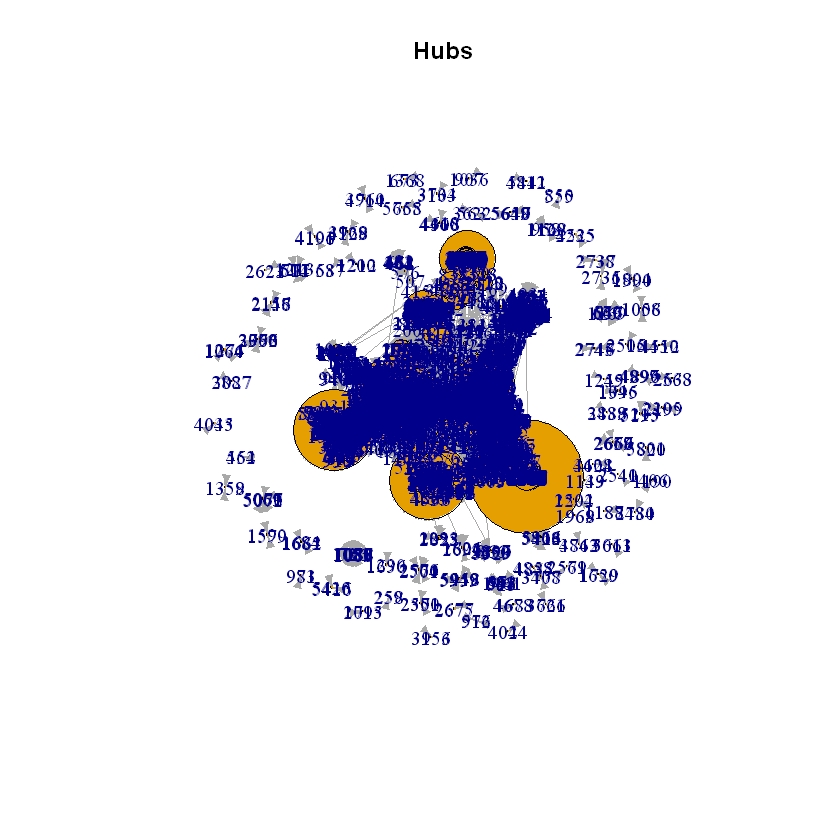

In [42]:
hs <- hub_score(g3, weights=NA)$vector
plot(g3, vertex.size=hs*50, main="Hubs", edge.arrow.size= 0.5)

# Distance and Path

### 1. Calculate the average path length for both (undirected and directed network).

In [43]:
path1 <- mean_distance(g3, directed = TRUE, unconnected = TRUE)
path2 <- mean_distance(g3, directed = FALSE, unconnected = TRUE)
cat(" Average Directed Path:", path1)
cat(" Average Undrected Path:", path2)

 Average Directed Path: 4.881611 Average Undrected Path: 4.438495

### 2. Using the undirected network, find all the shortest paths from one node to another and the length of all shortest paths in the graph.

In [44]:
all_shortest_paths(
  g3,
  from = "6",
  to = V(g3),
  mode = c("all"),
  weights = NULL
)

$res
$res[[1]]
+ 1/2337 vertex, named, from 1afcdd1:
[1] 6

$res[[2]]
+ 3/2337 vertices, named, from 1afcdd1:
[1] 6    1018 17  

$res[[3]]
+ 3/2337 vertices, named, from 1afcdd1:
[1] 6    1018 17  

$res[[4]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 6    1810 2125 13  

$res[[5]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 6    1810 1757 13  

$res[[6]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 6    1018 1565 13  

$res[[7]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 6    1810 1565 13  

$res[[8]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 6    1810 1565 13  

$res[[9]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 6    2028 1565 13  

$res[[10]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 6    1018 1565 13  

$res[[11]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 6    1810 1565 13  

$res[[12]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 6    1810 1565 13  

$res[[13]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 6    2028 1565 13  

$res[[14]]
+ 4/2337 vertices, named, from 1afc

### 3. Find the shortest path from the node with highest betweenness centrality (broker) to all other nodes. Color the path that has the longest shortest path from the broker to its destination node. Repeat the same for nodes with highest degree and eigenvector centrality values.

In [45]:
shortest_paths(g3,from="6",to = "1")

$vpath
$vpath[[1]]
+ 3/2337 vertices, named, from 1afcdd1:
[1] 6   114 1  


$epath
NULL

$predecessors
NULL

$inbound_edges
NULL


In [46]:
shortest_paths(
  g3,
  from = "35",
  to = V(g3),
  mode = c("out", "all", "in"),
  weights = NULL,
  output = c("vpath", "epath", "both"),
  predecessors = FALSE,
  inbound.edges = FALSE
)

Warning message in shortest_paths(g3, from = "35", to = V(g3), mode = c("out", "all", :
"At structural_properties.c:768 :Couldn't reach some vertices"


$vpath
$vpath[[1]]
+ 2/2337 vertices, named, from 1afcdd1:
[1] 35 6 

$vpath[[2]]
+ 3/2337 vertices, named, from 1afcdd1:
[1] 35  149 17 

$vpath[[3]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 35 7  29 13

$vpath[[4]]
+ 3/2337 vertices, named, from 1afcdd1:
[1] 35 7  29

$vpath[[5]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 35 56 1  31

$vpath[[6]]
+ 3/2337 vertices, named, from 1afcdd1:
[1] 35 56 1 

$vpath[[7]]
+ 1/2337 vertex, named, from 1afcdd1:
[1] 35

$vpath[[8]]
+ 2/2337 vertices, named, from 1afcdd1:
[1] 35 7 

$vpath[[9]]
+ 0/2337 vertices, named, from 1afcdd1:

$vpath[[10]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 35  390 171 45 

$vpath[[11]]
+ 5/2337 vertices, named, from 1afcdd1:
[1] 35  390 171 45  53 

$vpath[[12]]
+ 5/2337 vertices, named, from 1afcdd1:
[1] 35 7  29 13 54

$vpath[[13]]
+ 4/2337 vertices, named, from 1afcdd1:
[1] 35   1396 41   36  

$vpath[[14]]
+ 3/2337 vertices, named, from 1afcdd1:
[1] 35   1396 41  

$vpath[[15]]
+ 4/2337 vertices, named, fr

Warning message in shortest_paths(g3, from = "35", to = V(g3)):
"At structural_properties.c:768 :Couldn't reach some vertices"


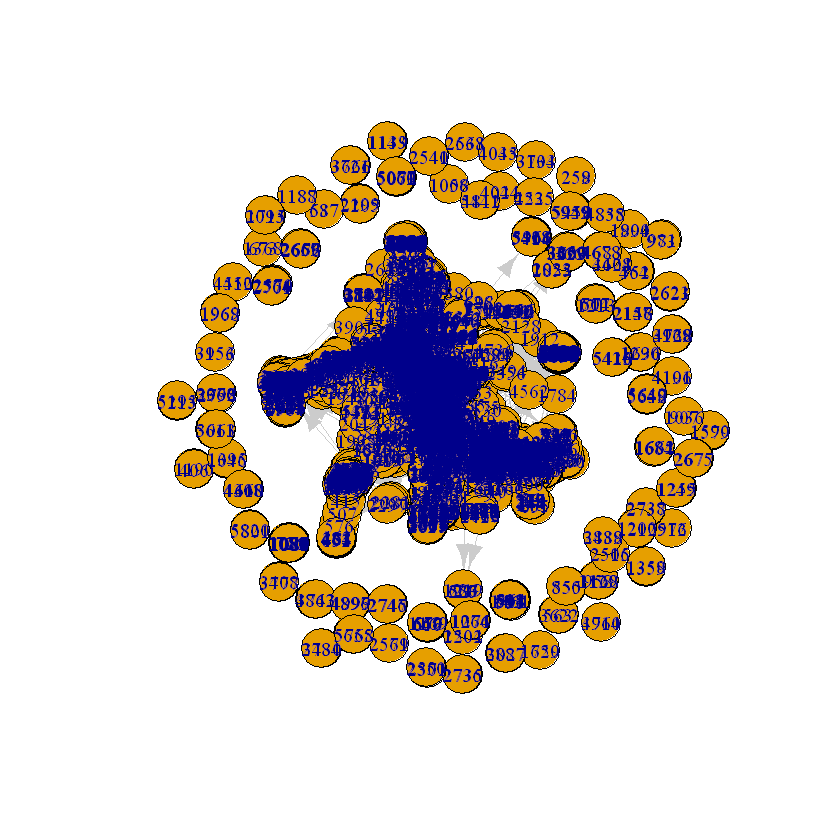

In [53]:
path_vk=shortest_paths(g3,from="35", to=V(g3))$vpath[[2295]]
ecol=rep("gray80",ecount(g3))
ecol[E(g3,path = path_vk)]="orange"
ew=rep(1,ecount(g3))
ew[E(g3,path = path_vk)]=3
plot(g3,edge.color=ecol,edge.width=ew)

In [48]:
longest.shortest.paths <- function(graph){
    # Return edgelist of all node-pairs between which the shortest path
    # in a graph are the longest shortest path observed in that graph.

    # Get all the shortest paths of a graph
    shortest.paths = shortest.paths(graph)

    # Make sure that there are no Inf-values caused by isolates in the graph
    shortest.paths[shortest.paths == Inf] <- 0

    # What nodes in the distance matrix are linked by longest shortest paths?
    el <- which(shortest.paths==max(shortest.paths), arr.ind=TRUE)
    colnames(el) <- c("i","j")
    (el)
}

longest.shortest.paths(g3)

i    j   
1164  421  279
893  1866  279
1164  421  291
893  1866  291
560   279  421
871   291  421
560   279 1866
871   291 1866

### 4. Identify the immediate neighbours of the node with highest degree centrality value. Set colors to plot the neighbours. Display the network and explain the neighbours with this important node.

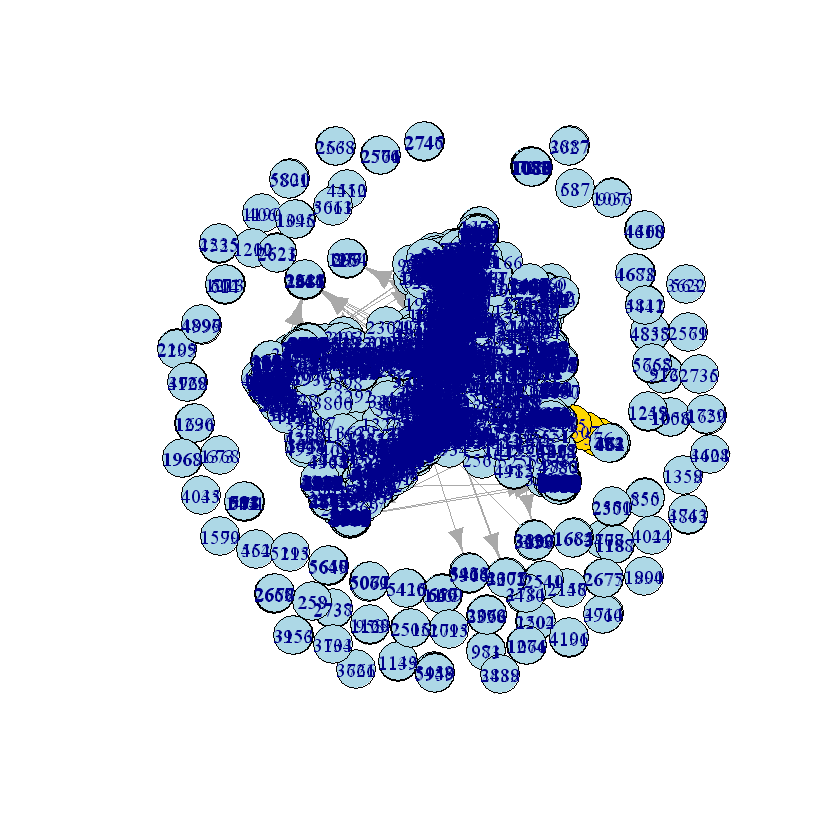

In [55]:
neigh.nodes <- neighbors(g3, V(g3), mode="all")

# Set colors to plot the neighbors:

vcol[neigh.nodes] <- "#ff9d00"

plot(g3, vertex.color=vcol)

### 5. Identify the immediate neighbours of the node with highest eigenvector centrality value. Set colors to plot the neighbours. Display the network and explain the neighbours with this important node.

# Subgroups and Communities

### 1. Find cliques in the network and display it. How many cliques that you can find in the network?

In [58]:
g3.sym <- as.undirected(g3, mode= "collapse", edge.attr.comb=list(weight="sum", "ignore"))
cliques(g3.sym) # list of cliques       
sapply(cliques(g3.sym), length) # clique sizes
largest_cliques(g3.sym) # cliques with max number of nodes
vcol <- rep("grey80", vcount(g3.sym))
vcol[unlist(largest_cliques(g3.sym))] <- "gold"


[[1]]
+ 1/2337 vertex, named, from c90f731:
[1] 2642

[[2]]
+ 1/2337 vertex, named, from c90f731:
[1] 35

[[3]]
+ 1/2337 vertex, named, from c90f731:
[1] 2028

[[4]]
+ 1/2337 vertex, named, from c90f731:
[1] 2125

[[5]]
+ 1/2337 vertex, named, from c90f731:
[1] 1

[[6]]
+ 1/2337 vertex, named, from c90f731:
[1] 4197

[[7]]
+ 1/2337 vertex, named, from c90f731:
[1] 1018

[[8]]
+ 1/2337 vertex, named, from c90f731:
[1] 4172

[[9]]
+ 1/2337 vertex, named, from c90f731:
[1] 546

[[10]]
+ 1/2337 vertex, named, from c90f731:
[1] 1317

[[11]]
+ 1/2337 vertex, named, from c90f731:
[1] 2296

[[12]]
+ 1/2337 vertex, named, from c90f731:
[1] 2625

[[13]]
+ 1/2337 vertex, named, from c90f731:
[1] 2045

[[14]]
+ 1/2337 vertex, named, from c90f731:
[1] 4694

[[15]]
+ 1/2337 vertex, named, from c90f731:
[1] 1217

[[16]]
+ 1/2337 vertex, named, from c90f731:
[1] 732

[[17]]
+ 1/2337 vertex, named, from c90f731:
[1] 2897

[[18]]
+ 1/2337 vertex, named, from c90f731:
[1] 545

[[19]]
+ 1/2337 vertex, nam

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [445] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [482] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [519] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [593] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [630] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [667] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [704] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [741] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [778] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [815] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [852] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [889] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [926] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [963] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1000] 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1037] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
[1074] 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[1111] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
[1148] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
[1185] 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2
[1222] 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2
[1259] 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2
[1296] 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2
[1333] 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2
[1370] 1 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2
[1407] 2 2 2 1 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 1
[1444] 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 1
[1481] 2 2 2 2 1 2 2 1 2 1 2 2 1 2 2 2 1 2 2 2 2 2 1 2 1 2 1 2 1 2 2 2 2 1 2 2 2
[1518] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2
[1555] 2 1 2 1 2 1 2 2 1 2 2 1 2 1 2 1 2 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 2
[1592] 1 2 2 2 1 2 1 2 2 1 2 2 1 2 2 2 1 2 1 2 2 1 2 2 1 2 2 1 2 1 2 2 1 2 2 2 2
[1629] 1 2 2 1 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 1 2 2 1 2 2
[1666] 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 2 1 2 1 2 1 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2
[1703] 1 2 2 1 2 1 2 1 2 2 1 2 2 2 2 1 2 2 2 1 2 1 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2
[1740] 2 1 2 2 2 2 1 2 1 2 1 2 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2
[1777] 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 1 2 1 2
[1814] 1 2 1 2 1 2 2 1 2 1 2 1 2 2

[[1]]
+ 4/2337 vertices, named, from c90f731:
[1] 2198 2388 546  1899

[[2]]
+ 4/2337 vertices, named, from c90f731:
[1] 5482 4860 3707 3722

[[3]]
+ 4/2337 vertices, named, from c90f731:
[1] 5482 4860 3707 3640

[[4]]
+ 4/2337 vertices, named, from c90f731:
[1] 5482 4921 1    3722

[[5]]
+ 4/2337 vertices, named, from c90f731:
[1] 3640 3707 5440 545 

[[6]]
+ 4/2337 vertices, named, from c90f731:
[1] 3640 3707 5440 4860

[[7]]
+ 4/2337 vertices, named, from c90f731:
[1] 4499 1810 1832 2642

[[8]]
+ 4/2337 vertices, named, from c90f731:
[1] 4518 3988 2045 2942

[[9]]
+ 4/2337 vertices, named, from c90f731:
[1] 4291 3828 41   3598

[[10]]
+ 4/2337 vertices, named, from c90f731:
[1] 1318 2934 2266 2658

[[11]]
+ 4/2337 vertices, named, from c90f731:
[1] 2942 2045 57   353 

[[12]]
+ 4/2337 vertices, named, from c90f731:
[1] 2942 1565 57   353 

[[13]]
+ 4/2337 vertices, named, from c90f731:
[1] 2942 905  2063 3988

[[14]]
+ 4/2337 vertices, named, from c90f731:
[1] 1317 1207 468  522 

[

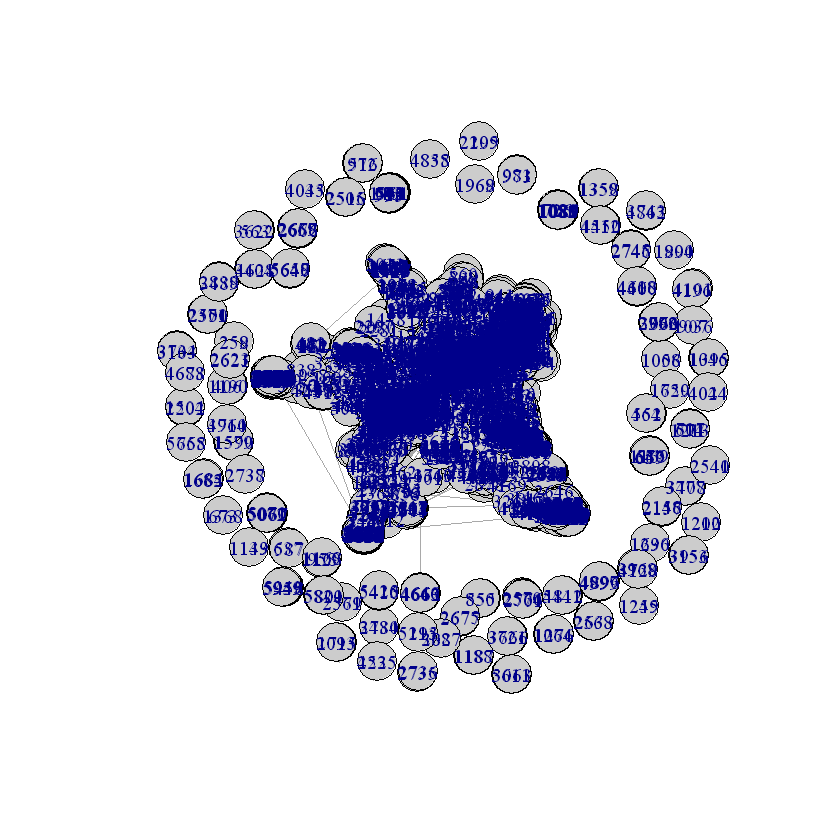

In [59]:
plot(as.undirected(g3.sym), vertex.label=V(g3.sym)$name, vertex.color=vcol)

### 2. Find a community detection algorithm in igraph. Explain how it works. Apply the community detection on your network and display the network. Each community must be in its own color.
- Find the number of communities that occur.
- Find its membership
- Find how modular the graph partitioning is. (High modularity for a partitioning reflects dense connections within communities and sparse connections across communities)

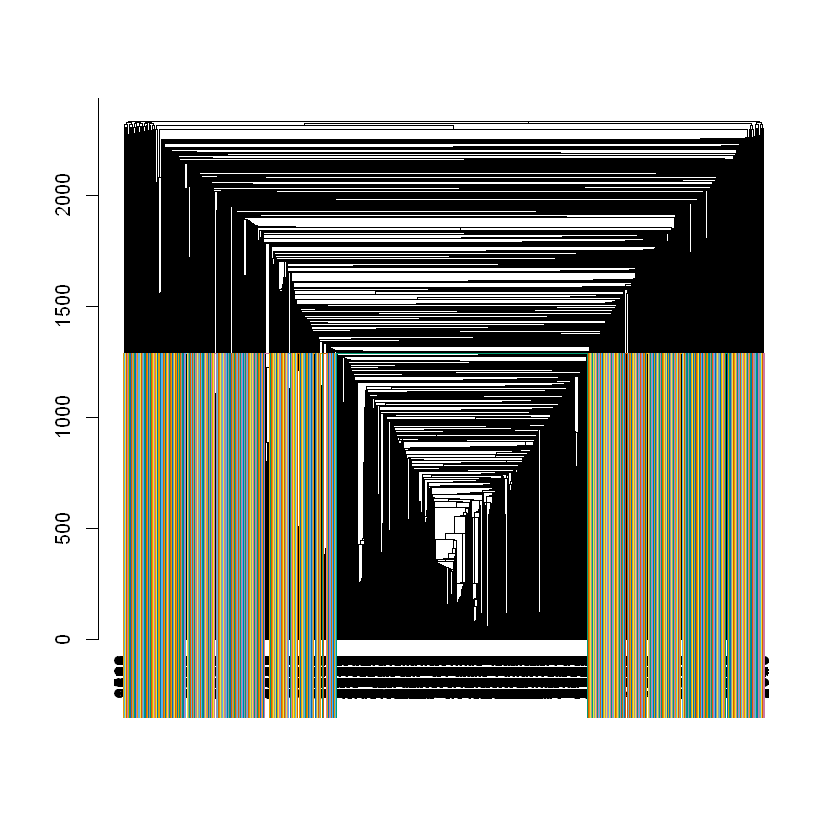

In [60]:
ceb <- cluster_edge_betweenness(g3) 
dendPlot(ceb, mode="hclust")

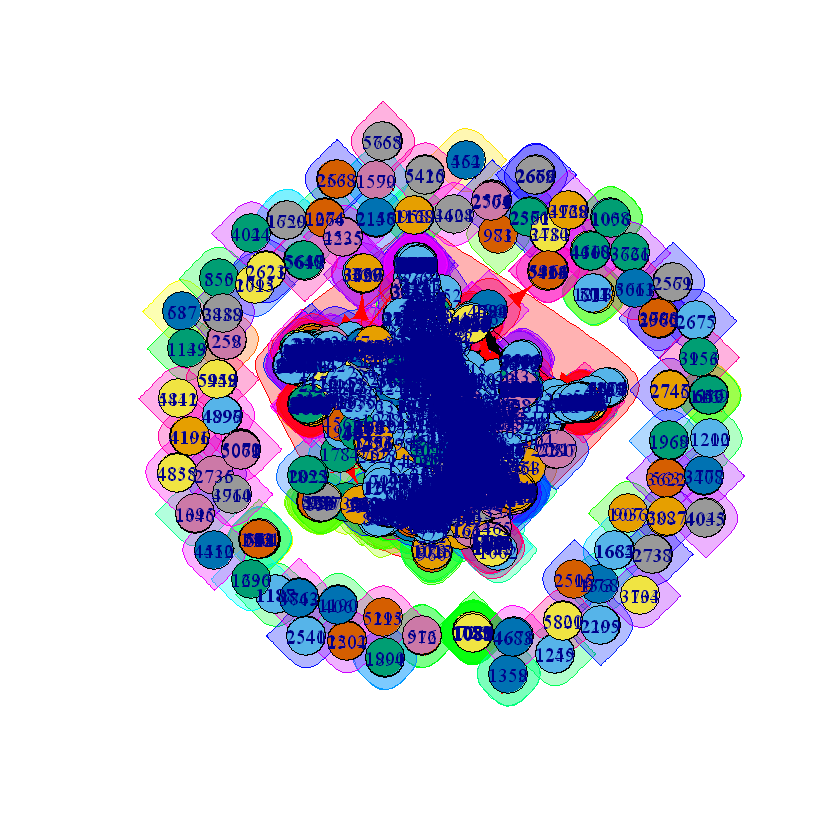

In [61]:
plot(ceb, g3) 

In [62]:
membership(ceb) # community membership for each node

   6   17   13   29   31    1   35    7   47   45   53   54   36   41   21   39 
   1    2    3    4    5    2    6    2    7    8    9   10   11    2   12   13 
   4   61   65   56   66   69   57   68   81   89   15   97   62   80  100   96 
  14   15   16   17   18   19   20   21   22   23   24   25   26    2   27    2 
 107   64  112   60   76  116    2  132  113  125  135   78  110   93  104  154 
  28   29    2   30   31   32    2   33    2   34   35   36   37   38   39    2 
 158  153  114  157   75  169  171  166  156  175  148  181  183  184   33  189 
  40   41   42   43   44   45    2   46   47   48   49   50   51   52   53   54 
 159  200  207  142  143  206  213  217  232  222  202  240  244  228  248  245 
   2   55   56   57   58   59   60   61   62   63   64   65   66   67   68   69 
 251  259   23  215  221  261  230  141   37  219  274  295  282  272  229  198 
  70   71   72   73   74   75   76   77   78    2   79   80   81   82   83   84 
 204  186  312  273  254  32

In [63]:
modularity(ceb)

[1] 0.2137626

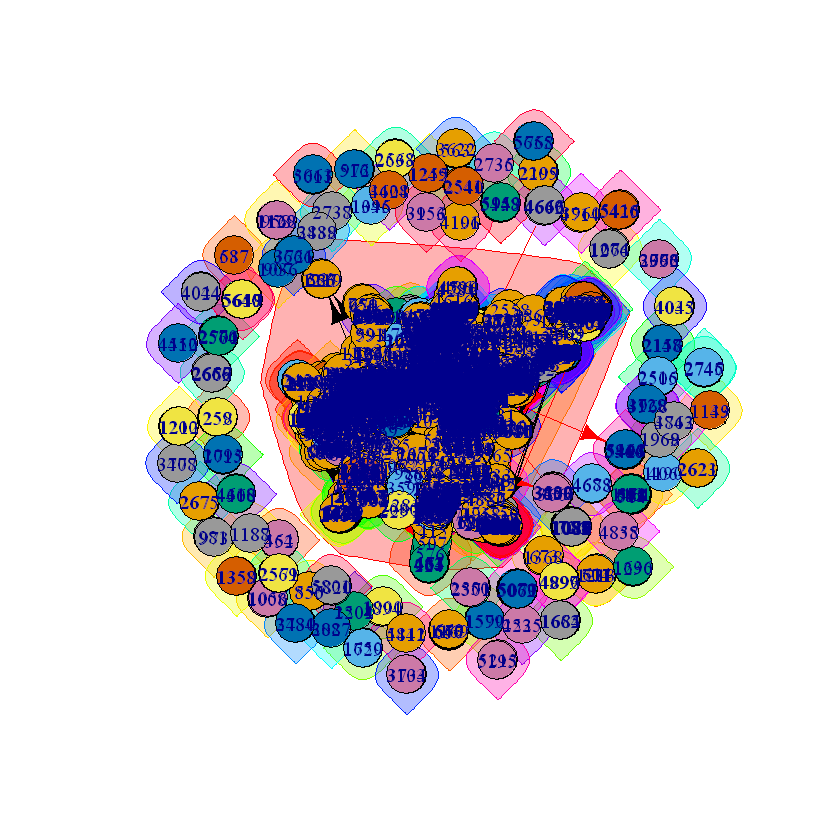

In [64]:
clp <- cluster_label_prop(g3)
plot(clp, g3)

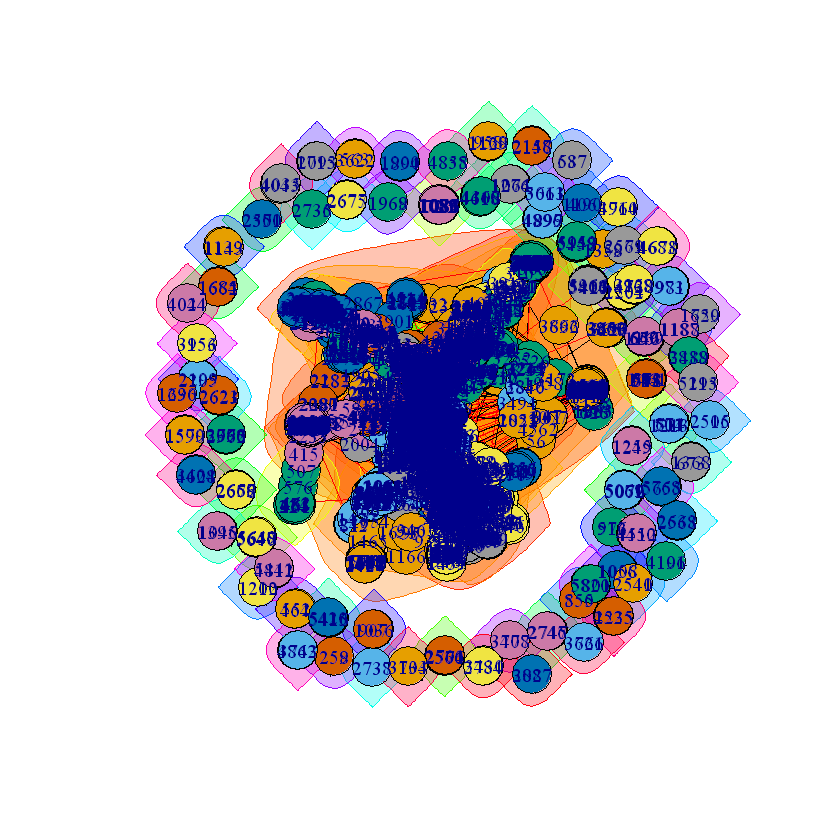

In [65]:
cfg <- cluster_fast_greedy(as.undirected(g3))
plot(cfg, as.undirected(g3))

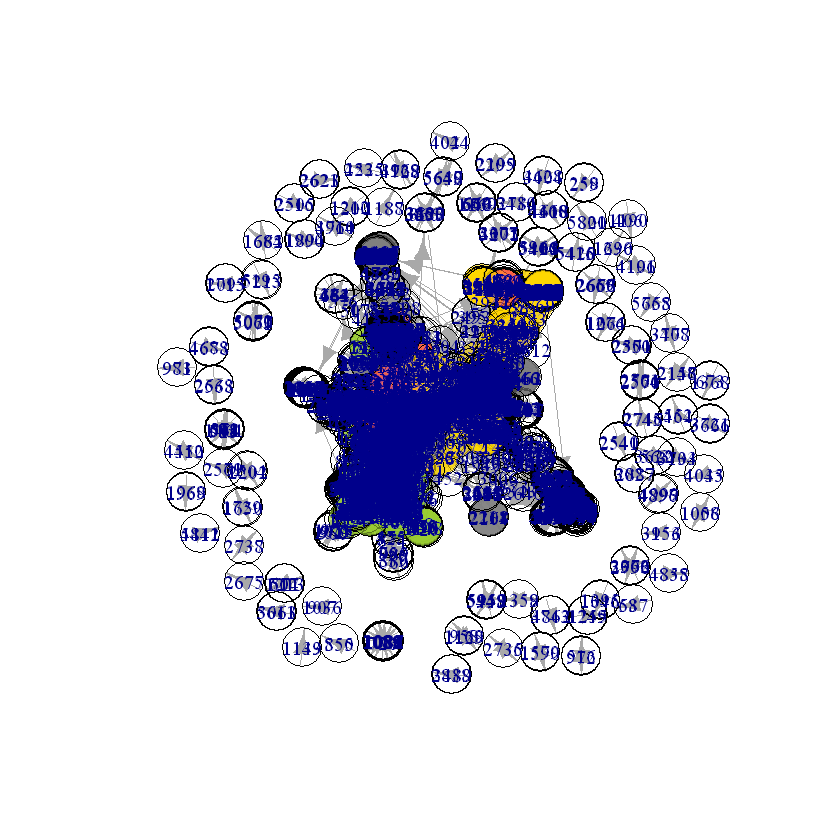

In [66]:
V(g3)$community <- cfg$membership
colrs <- adjustcolor( c("gray50", "tomato", "gold", "yellowgreen"), alpha=.6)
plot(g3, vertex.color=colrs[V(g3)$community])